## Modelo

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
col_names = ['Area','N','P205','K2SO4','CaO','MgO','Zn','Qfe','B','Rendimiento']
ds = pd.read_csv("soil_rendimiento_Interval.csv")
ds.columns = col_names
ds.head()

,Area,N,P205,K2SO4,CaO,MgO,Zn,Qfe,B,Rendimiento
0,3.29,171,47,157,20,31.0,8.0,2.0,4,c
1,3.29,258,76,225,30,37.0,8.0,2.7,3,d
2,3.29,188,54,171,99,38.0,1.2,0.2,3,e
3,3.29,175,47,177,20,40.0,8.0,2.0,4,f
4,3.29,197,54,171,99,38.0,1.2,2.0,3,f


In [ ]:
#split dataset in features and target variable
feature_cols = ['Area','N','P205','K2SO4','CaO','MgO','Zn','Qfe','B']
x = ds[feature_cols] # Features
y = ds.Rendimiento # Target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [ ]:
# Creacion DT
clf = DecisionTreeClassifier()

# Entrenamiento DT
clf = clf.fit(X_train,y_train)

# Predicción
y_pred = clf.predict(X_test)

In [ ]:
# Acc
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.625


## Visualización

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\JorgeRJimenez\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


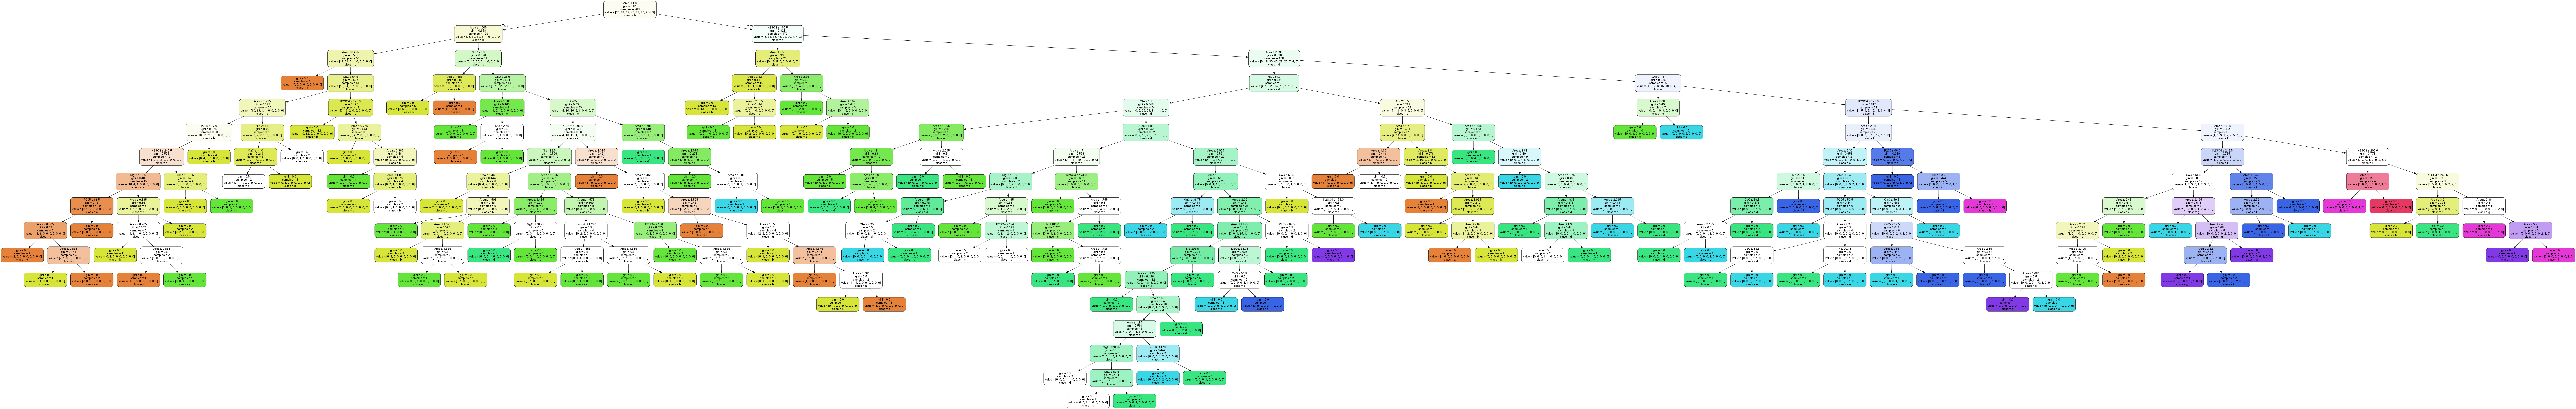

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['a','b','c','d','e','f','g','h','i'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DT_SOIL.png')
Image(graph.create_png())